In [1]:
from io import StringIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats, optimize

import pyesg

In [2]:
arp = pyesg.AcademyRateProcess()

In [12]:
x0 = [0.03, 0.0037, 0.03]
out = np.array([arp.scenario(x0, dt=1/12, n_step=360, random_state=42) for _ in range(1000)])

In [17]:
out[0]

array([[0.03      , 0.0037    , 0.03      ],
       [0.03052264, 0.00355081, 0.03226032],
       [0.03213423, 0.00303548, 0.03125749],
       ...,
       [0.04556319, 0.02797648, 0.02846442],
       [0.04659961, 0.02626927, 0.02381103],
       [0.04587165, 0.0288955 , 0.02645123]])

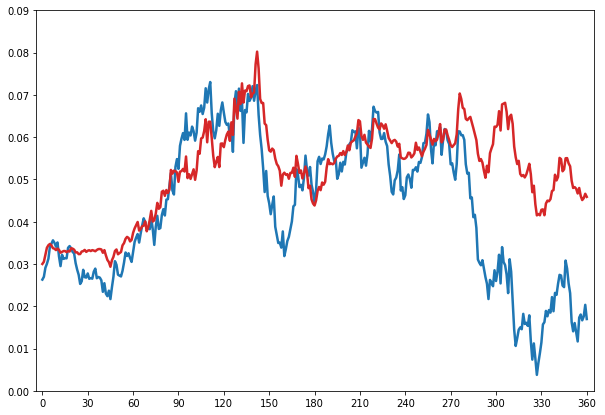

In [6]:
fig, ax = plt.subplots(figsize=(10,7))

arp = pyesg.AcademyRateProcess()
out = arp.scenario(x0=[0.03, 0.0037, 0.03], dt=1/12, n_step=360, random_state=42)

ax.plot(range(361), out[:, 0] - out[:, 1], c='C0', lw=2.5)
ax.plot(range(361), out[:, 0], c='C3', lw=2.5)

ax.set_xlim(-4, 365)
ax.set_xticks(np.arange(0, 361, 30))
ax.set_ylim(0, 0.09)

plt.show()

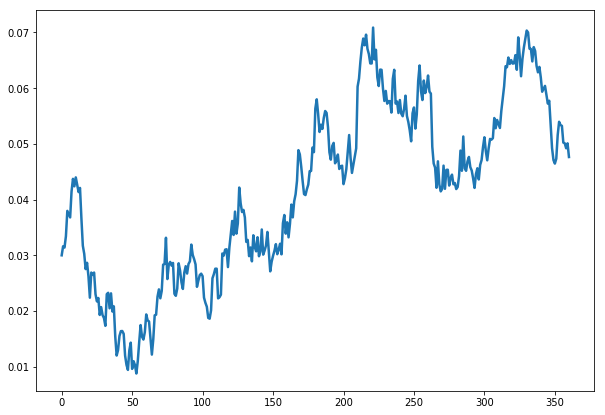

In [13]:
fig, ax = plt.subplots(figsize=(10,7))

oup = pyesg.OrnsteinUhlenbeckProcess(mu=0.045, sigma=0.01, theta=0.15)
out = oup.scenario(x0=0.03, dt=1/12, n_step=360, random_state=42)

ax.plot(range(361), out, c='C0', lw=2.5)

# ax.set_xlim(-4, 365)
# ax.set_xticks(np.arange(0, 361, 30))
# ax.set_ylim(0, 0.09)

# plt.show()

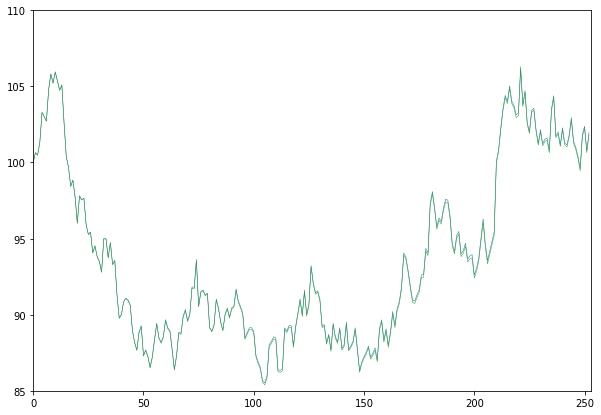

In [19]:
fig, ax = plt.subplots(figsize=(10,7))

gbm = pyesg.GeometricBrownianMotion(mu=0.05, sigma=0.2)
gbm = gbm.scenario(x0=100.0, dt=1/252, n_step=252, random_state=42)
ax.plot(range(253), gbm, c='C0', lw=0.5)

bsp = pyesg.BlackScholesProcess(mu=0.05, sigma=0.2)
bsp = bsp.scenario(x0=100.0, dt=1/252, n_step=252, random_state=42)
ax.plot(range(253), bsp, c='C2', lw=0.5)

ax.set_xlim(0, 253)
ax.set_ylim(85, 110)

plt.show()